# CLEAN COMPANY IDENTITY
## CLEAN AND RESTRUCTURE - PART1
Notebook to clean the list of company identities and find out which ones were listed and which ones were delisted<br>
Read - company_identity_dat.txt<br>
Write - clean_identity.csv'- this is cleaned version of all our companies of interest - used by tableau dashboard<br>
Write - restructure_identity.csv - this is the restructured version of the clean_identity.csv just more condusive for making our model data

In [15]:
import numpy as np
import pandas as pd
import requests
import matplotlib.pyplot as plt
import seaborn as sns

# allow render in Jupyter notebook
%matplotlib inline
%pylab inline 
%config IPCompleter.greedy=True
%config InlineBackend.figure_format = 'svg'
sns.set_style("white")

Populating the interactive namespace from numpy and matplotlib


In [16]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 30)

 ### 1. READ DATA AND EXPLORE

In [17]:
df_id = pd.read_csv('../data/company_data/company_identity_dat.txt', delimiter ="|")
df_id.head()

,co_code,company_name,short_name,cin_code,isin_code_equity,entity_type_code,mr_entity_type_name,owner_code,owner_gp_name,co_industry_type,nic_prod_code,nic_name,nse_symbol,bse_scrip_code,bse_code,bse_scrip_id,bse_listing_flag,nse_first_traded_date,nse_suspended_from_date,nse_suspended_to_date,nse_delist_date,bse_first_traded_date,bse_suspended_from_date,bse_suspended_to_date,bse_delist_date,regdpin
0,3,'K' STEAMSHIP AGENCIES PVT. LTD.,NaN,U63090MH1971PTC015089,NaN,10203010000,Private Ltd.,20102000000,Private (Indian),1.0,46909.0,Other non-specialised wholesale trade n.e.c.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,400022.0
1,11,20 MICRONS LTD.,20 MICRONS,L99999GJ1987PLC009768,INE144J01027,10203020000,Public Ltd.,20102000000,Private (Indian),1.0,8.0,Other mining and quarrying,20MICRONS,533022.0,533022.0,20MICRONS,B,20081006.0,NaN,NaN,NaN,20081006.0,NaN,NaN,NaN,391760.0
2,12,20TH CENTURY ENGG. LTD.,20TH CENTURY ENGG.,U31900DL1984PLC018942,INE091F01010,10203020000,Public Ltd.,20101030899,SPML Group,1.0,71100.0,Architectural and engineering activities and r...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,110020.0
3,13,GREENSTONE INVESTMENTS PVT. LTD.,GREENSTONE INVSTS.,U65990MH1978PTC020803,NaN,10203010000,Private Ltd.,20102000000,Private (Indian),2.0,64300.0,"Trusts, funds and other financial vehicles",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,400021.0
4,14,20TH CENTURY FINANCE CORPN. LTD. [MERGED],20TH CENTURY FINANCE,U99999MH1979PTC021609,INE420A01012,10203020000,Public Ltd.,20102000000,Private (Indian),2.0,64920.0,Other credit granting,20THCENFIN,500001.0,1.0,20TH CENTURY,NaN,19941214.0,NaN,NaN,19990528.0,19820720.0,NaN,NaN,19990524.0,400012.0


In [18]:
df_id.shape

(49771, 26)

In [19]:
df_id.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49771 entries, 0 to 49770
Data columns (total 26 columns):
co_code                    49771 non-null int64
company_name               49771 non-null object
short_name                 18822 non-null object
cin_code                   49318 non-null object
isin_code_equity           11052 non-null object
entity_type_code           49771 non-null int64
mr_entity_type_name        49771 non-null object
owner_code                 49771 non-null int64
owner_gp_name              49771 non-null object
co_industry_type           49725 non-null float64
nic_prod_code              49725 non-null float64
nic_name                   49725 non-null object
nse_symbol                 2979 non-null object
bse_scrip_code             8078 non-null float64
bse_code                   8078 non-null float64
bse_scrip_id               7864 non-null object
bse_listing_flag           7595 non-null object
nse_first_traded_date      2969 non-null float64
nse_suspended

### 2. SET CORRECT DATATYPES

In [20]:
# make co_code an int
df_id['co_code'] =df_id['co_code'].astype(int)

In [21]:
# make datetime values
df_id['nse_first_traded_date'] = pd.to_datetime(df_id['nse_first_traded_date'], format="%Y%m%d")
df_id['nse_suspended_from_date'] = pd.to_datetime(df_id['nse_suspended_from_date'], format="%Y%m%d")
df_id['nse_suspended_to_date'] = pd.to_datetime(df_id['nse_suspended_to_date'], format="%Y%m%d")
df_id['nse_delist_date'] = pd.to_datetime(df_id['nse_delist_date'], format="%Y%m%d")
df_id['bse_first_traded_date'] = pd.to_datetime(df_id['nse_first_traded_date'], format="%Y%m%d")
df_id['bse_suspended_from_date'] = pd.to_datetime(df_id['bse_suspended_from_date'], format="%Y%m%d")
df_id['bse_suspended_to_date'] = pd.to_datetime(df_id['bse_suspended_to_date'], format="%Y%m%d")
df_id['bse_delist_date'] = pd.to_datetime(df_id['bse_delist_date'], format="%Y%m%d")
df_id.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49771 entries, 0 to 49770
Data columns (total 26 columns):
co_code                    49771 non-null int64
company_name               49771 non-null object
short_name                 18822 non-null object
cin_code                   49318 non-null object
isin_code_equity           11052 non-null object
entity_type_code           49771 non-null int64
mr_entity_type_name        49771 non-null object
owner_code                 49771 non-null int64
owner_gp_name              49771 non-null object
co_industry_type           49725 non-null float64
nic_prod_code              49725 non-null float64
nic_name                   49725 non-null object
nse_symbol                 2979 non-null object
bse_scrip_code             8078 non-null float64
bse_code                   8078 non-null float64
bse_scrip_id               7864 non-null object
bse_listing_flag           7595 non-null object
nse_first_traded_date      2969 non-null datetime64[ns]
nse_su

In [22]:
df_id.head()

,co_code,company_name,short_name,cin_code,isin_code_equity,entity_type_code,mr_entity_type_name,owner_code,owner_gp_name,co_industry_type,nic_prod_code,nic_name,nse_symbol,bse_scrip_code,bse_code,bse_scrip_id,bse_listing_flag,nse_first_traded_date,nse_suspended_from_date,nse_suspended_to_date,nse_delist_date,bse_first_traded_date,bse_suspended_from_date,bse_suspended_to_date,bse_delist_date,regdpin
0,3,'K' STEAMSHIP AGENCIES PVT. LTD.,NaN,U63090MH1971PTC015089,NaN,10203010000,Private Ltd.,20102000000,Private (Indian),1.0,46909.0,Other non-specialised wholesale trade n.e.c.,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,400022.0
1,11,20 MICRONS LTD.,20 MICRONS,L99999GJ1987PLC009768,INE144J01027,10203020000,Public Ltd.,20102000000,Private (Indian),1.0,8.0,Other mining and quarrying,20MICRONS,533022.0,533022.0,20MICRONS,B,2008-10-06,NaT,NaT,NaT,2008-10-06,NaT,NaT,NaT,391760.0
2,12,20TH CENTURY ENGG. LTD.,20TH CENTURY ENGG.,U31900DL1984PLC018942,INE091F01010,10203020000,Public Ltd.,20101030899,SPML Group,1.0,71100.0,Architectural and engineering activities and r...,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,110020.0
3,13,GREENSTONE INVESTMENTS PVT. LTD.,GREENSTONE INVSTS.,U65990MH1978PTC020803,NaN,10203010000,Private Ltd.,20102000000,Private (Indian),2.0,64300.0,"Trusts, funds and other financial vehicles",NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,400021.0
4,14,20TH CENTURY FINANCE CORPN. LTD. [MERGED],20TH CENTURY FINANCE,U99999MH1979PTC021609,INE420A01012,10203020000,Public Ltd.,20102000000,Private (Indian),2.0,64920.0,Other credit granting,20THCENFIN,500001.0,1.0,20TH CENTURY,NaN,1994-12-14,NaT,NaT,1999-05-28,1994-12-14,NaT,NaT,1999-05-24,400012.0


### 3. SET DELIST = 1 AND DELIST DATE
Create two new columns. <br>
1. 'delisted' - indicates if company delisted 
2. 'delist_date' the date the delist happened<br>
Some companies may have been delisted from both the exchanges at different times. In this case we always use the earlier date of delisting

In [23]:
# the normal is delisted = 0
df_id['delisted'] = 0

In [24]:
# if either bse_delist or nse_delist is not null set the delisted = 1
df_id.loc[df_id['bse_delist_date'].notna() | df_id['nse_delist_date'].notna(),'delisted']=1

In [25]:
# see it
df_id['delisted'].value_counts()

0    46120
1     3651
Name: delisted, dtype: int64

In [26]:
# create  null datetime column called 'delist date'
df_id['delist_date'] = pd.to_datetime('13000101',format ='%Y-%m-%d', errors ='coerce')

In [27]:
# Some companies have been delisted from both the exchanges at different times use the earlier date

# if bse_delisting_date and nse_delisting_date put the one that happended earlier

# if nse earlier put nse date 
df_id.loc[(df_id['delisted']==1) & \
          (df_id['nse_delist_date'].notna()) & \
          (df_id['bse_delist_date'].notna()) & \
          (df_id['nse_delist_date']<=df_id['bse_delist_date']),'delist_date'] =\
df_id.loc[(df_id['delisted']==1) &\
          (df_id['nse_delist_date'].notna()) & \
          (df_id['bse_delist_date'].notna()) & \
          (df_id['nse_delist_date']<=df_id['bse_delist_date']),'nse_delist_date']


# if bse earlier put bse date 
df_id.loc[(df_id['delisted']==1) & \
          (df_id['nse_delist_date'].notna()) & \
          (df_id['bse_delist_date'].notna()) & \
          (df_id['bse_delist_date']<=df_id['nse_delist_date']),'delist_date'] =\
df_id.loc[(df_id['delisted']==1) &\
          (df_id['nse_delist_date'].notna()) & \
          (df_id['bse_delist_date'].notna()) & \
          (df_id['bse_delist_date']<=df_id['nse_delist_date']),'nse_delist_date']

In [28]:
# if bse_delisting_date and nse_delisting_dateput the non null one  

df_id.loc[(df_id['delisted']==1) &\
          (df_id['bse_delist_date'].isnull()),'delist_date'] =\
df_id.loc[(df_id['delisted']==1) &\
          (df_id['bse_delist_date'].isnull()),'nse_delist_date']

df_id.loc[(df_id['delisted']==1) &\
          (df_id['nse_delist_date'].isnull()),'delist_date'] =\
df_id.loc[(df_id['delisted']==1) &\
          (df_id['nse_delist_date'].isnull()),'bse_delist_date']

In [29]:
# to see if things are ok
df_id.loc[df_id['delisted']==1,['bse_delist_date','nse_delist_date','delisted','delist_date']].head()

,bse_delist_date,nse_delist_date,delisted,delist_date
4,1999-05-24,1999-05-28,1,1999-05-28
20,2004-07-02,NaT,1,2004-07-02
27,NaT,2005-07-21,1,2005-07-21
31,2018-07-04,NaT,1,2018-07-04
40,1997-02-17,NaT,1,1997-02-17


### 3. FIND LISTED COMPANIES AND SET LISTED DATE
Find companies that were at some point listed -- Only companies that were given a trading symbol were on the exchange. Identify these and set the listed = 1

In [30]:
# find all companies that are or were ever listed
df_id['listed']=0
df_id.loc[df_id['nse_symbol'].notna() | df_id['bse_scrip_code'].notna(),'listed'] =1

In [31]:
df_id['listed'].value_counts()

0    41463
1     8308
Name: listed, dtype: int64

In [32]:
# remove companies that were never listed to begin with
df_id = df_id.loc[df_id['listed']==1,:]

In [33]:
df_id.shape

(8308, 29)

##### Set the list_date if company was ever listed
I used the bse_first_traded_data or nse_first_traded_date to set my list_date. However a lot of companies hat trade don't have a first traded that is known this is becuase they may have started traded before 1990. Before 1990 the Indian economy was closed and there is very little information available earlier than 1990. 

In [34]:
# create  null datetime column called 'list_date' -- the first time it was listed on either stock exchange
df_id['list_date'] = pd.to_datetime('13000101',format ='%Y-%m-%d', errors ='coerce')

In [35]:
# if bse_first_trade_date and nse_first_traded_date put the one that happended earlier
df_id.loc[(df_id['listed']==1) & \
          (df_id['nse_first_traded_date'].notna()) & \
          (df_id['bse_first_traded_date'].notna()) & \
          (df_id['nse_first_traded_date']<=df_id['bse_first_traded_date']),'list_date'] =\
df_id.loc[(df_id['listed']==1) &\
          (df_id['nse_first_traded_date'].notna()) & \
          (df_id['bse_first_traded_date'].notna()) & \
          (df_id['nse_first_traded_date']<=df_id['bse_first_traded_date']),'nse_first_traded_date']

df_id.loc[(df_id['listed']==1) & \
          (df_id['nse_first_traded_date'].notna()) & \
          (df_id['bse_first_traded_date'].notna()) & \
          (df_id['bse_first_traded_date']<=df_id['nse_first_traded_date']),'list_date'] =\
df_id.loc[(df_id['listed']==1) &\
          (df_id['nse_first_traded_date'].notna()) & \
          (df_id['bse_first_traded_date'].notna()) & \
          (df_id['bse_first_traded_date']<=df_id['nse_first_traded_date']),'nse_first_traded_date']

In [36]:
# if bse_first_trade_date and nse_first_trade_date put the non null one  

df_id.loc[(df_id['listed']==1) &\
          (df_id['bse_first_traded_date'].isnull()),'list_date'] =\
df_id.loc[(df_id['listed']==1) &\
          (df_id['bse_first_traded_date'].isnull()),'nse_first_traded_date']

df_id.loc[(df_id['listed']==1) &\
          (df_id['nse_first_traded_date'].isnull()),'list_date'] =\
df_id.loc[(df_id['listed']==1) &\
          (df_id['nse_first_traded_date'].isnull()),'bse_first_traded_date']

### 4. WRITE TO FILE - clean_identity.csv

In [37]:
# writing to intermediate csv -- this csv to be used for data visualizations on tableau
df_id.to_csv('../data/clean_identity.csv')

In [38]:
check = pd.read_csv('../data/clean_identity.csv')
check = check.drop(columns = 'Unnamed: 0')
check.head()

,co_code,company_name,short_name,cin_code,isin_code_equity,entity_type_code,mr_entity_type_name,owner_code,owner_gp_name,co_industry_type,nic_prod_code,nic_name,nse_symbol,bse_scrip_code,bse_code,bse_scrip_id,bse_listing_flag,nse_first_traded_date,nse_suspended_from_date,nse_suspended_to_date,nse_delist_date,bse_first_traded_date,bse_suspended_from_date,bse_suspended_to_date,bse_delist_date,regdpin,delisted,delist_date,listed,list_date
0,11,20 MICRONS LTD.,20 MICRONS,L99999GJ1987PLC009768,INE144J01027,10203020000,Public Ltd.,20102000000,Private (Indian),1.0,8.0,Other mining and quarrying,20MICRONS,533022.0,533022.0,20MICRONS,B,2008-10-06,NaN,NaN,NaN,2008-10-06,NaN,NaN,NaN,391760.0,0,NaN,1,2008-10-06
1,14,20TH CENTURY FINANCE CORPN. LTD. [MERGED],20TH CENTURY FINANCE,U99999MH1979PTC021609,INE420A01012,10203020000,Public Ltd.,20102000000,Private (Indian),2.0,64920.0,Other credit granting,20THCENFIN,500001.0,1.0,20TH CENTURY,NaN,1994-12-14,NaN,NaN,1999-05-28,1994-12-14,NaN,NaN,1999-05-24,400012.0,1,1999-05-28,1,1994-12-14
2,289,A B C INDIA LTD.,NaN,L63011WB1972PLC217415,INE125D01011,10203020000,Public Ltd.,20101020442,TCI-Bhoruka Group,1.0,46909.0,Other non-specialised wholesale trade n.e.c.,NaN,520123.0,20123.0,ABCINDQ,X,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,700073.0,0,NaN,1,NaN
3,301,A B C O PLASTICS LTD.,A B C O PLASTICS,L25209TN1994PLC027000,INE522601017,10203020000,Public Ltd.,20102000000,Private (Indian),1.0,22209.0,Manufacture of other plastics products n.e.c.,NaN,526699.0,26699.0,ABCO PLASTIC,Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2004-07-02,601201.0,1,2004-07-02,1,NaN
4,363,STARLOG ENTERPRISES LTD.,A B G HEAVY INDS.,L63010MH1983PLC031578,INE580C01019,10203020000,Public Ltd.,20101030131,ABG Group,1.0,82990.0,Other business support service activities n.e.c.,ABGHEAVY,520155.0,20155.0,STARLOG,X,1995-05-10,NaN,NaN,2005-07-21,1995-05-10,NaN,NaN,NaN,400021.0,1,2005-07-21,1,1995-05-10


### 5. RESTRUCTURE FOR MODEL

In [39]:
re_df = check
re_df = re_df.loc[(re_df['listed']==1) | (re_df['delisted']==1),:]

In [40]:
re_df.shape

(8308, 30)

In [41]:
# headers that are basic and needed for final model ... get rid of other stuff
headers = ['co_code', 'company_name', 'listed','delisted', 'delist_date']

In [42]:
re_df = re_df[headers]

In [43]:
re_df.shape

(8308, 5)

In [44]:
re_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8308 entries, 0 to 8307
Data columns (total 5 columns):
co_code         8308 non-null int64
company_name    8308 non-null object
listed          8308 non-null int64
delisted        8308 non-null int64
delist_date     3651 non-null object
dtypes: int64(3), object(2)
memory usage: 389.4+ KB


In [46]:
#  set delisted_date to a datetime
re_df['delist_date'] = pd.to_datetime(re_df['delist_date'], format="%Y-%m-%d")

In [47]:
re_df.head()

,co_code,company_name,listed,delisted,delist_date
0,11,20 MICRONS LTD.,1,0,NaT
1,14,20TH CENTURY FINANCE CORPN. LTD. [MERGED],1,1,1999-05-28
2,289,A B C INDIA LTD.,1,0,NaT
3,301,A B C O PLASTICS LTD.,1,1,2004-07-02
4,363,STARLOG ENTERPRISES LTD.,1,1,2005-07-21


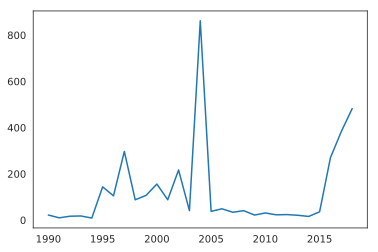

In [49]:
# quick explore look at how many companies got delisted each year
gp1 = re_df.groupby([re_df['delist_date'].dt.year]).sum().reset_index()
gp1.loc[:,['delist_date','delisted']]
plt.plot(gp1.loc[:,['delist_date']],gp1.loc[:,['delisted']]);

# write to plot_it ... for our presentation 
#gp1.loc[:,['delist_date','delisted']].to_csv('plot_it.csv')

### 6. WRITE TO FILE - restructure_identity.csv

In [37]:
# write to a file called restuctured_identity
re_df.to_csv('../data/restructure_identity.csv')

### next -> financial_statements_clean.ipynb